# Introduction

## Defining the problem and assembling a dataset

In this courswork the Fashion MNIST dataset will be used to follow the workflow of Deep learning with Python.

The Fashion MNIST dataset  contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution. Some samples are seen below in the code.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The challenge is to build and train a neural network, which should predict the correct label of a given imagine. 


#  Methodology


## Choosing a measure of success

Since this is a multiclass, single-label classification task the metric of success will be the test accuarcy and test loss of the model. A satisfaying result would be to achieve 90% accuracy or higher. The higher the accuary, the more satisfing is the result.

## Deciding on an evaluation protocol

Because the Fashion MNISt dataset contains 60,000 imagines for training and 10,000 for testing, it is big enough to maintain a hold-out validation set. The validation set will be split from the training data.

## Preparing the data

In [36]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras import regularizers
print(tf.__version__)

2.7.0


In [37]:
# loading the fashin mnist dataset 
# source: https://www.tensorflow.org/tutorials/keras/classification
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
# creating class names for visualisation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
# looking at the data 
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


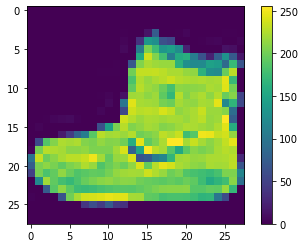

In [40]:
# plotting the first train image
# source : https://www.tensorflow.org/tutorials/keras/classification
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

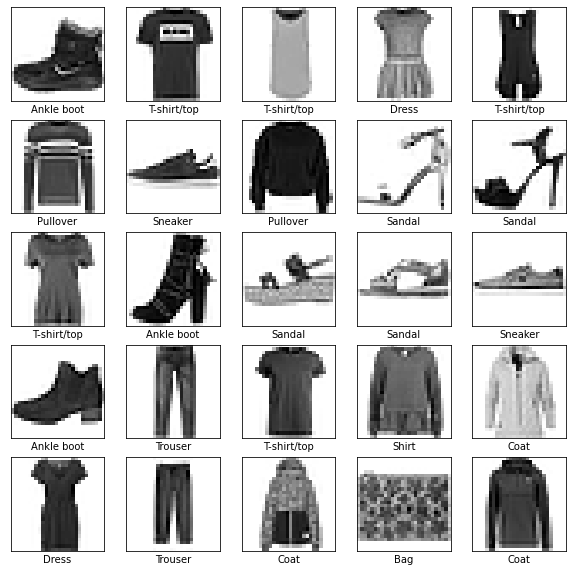

In [41]:
# plotting several imagines with according labels
# source: https://www.tensorflow.org/tutorials/keras/classification
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [42]:
# reshaping and reformatting the data into correct type and shape for neural network
# source : DLWP page 29, Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images.shape

(60000, 784)

In [43]:
# slicing data into partial x and y train set, aswell as validation set
# source : DSM150-2021-OCT, lecture 3.407 Validating and training
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Now the data has been prepared and a validation set has been set aside. The tensors of input data and target data are ready,to begin building and training a neural network.

## Developing a model that does better than a baseline

The first goal is to achieve statistical power, which means to develp a model that does better than a random statistic baseline. In the exmaple of this dataset with 10 classes the baseline to beat would be 10%, because a model, wich would predict the labels at random would have a 10% chance of being correct each time.


3 key choices need to be  made when building a neural network:

1.Last layer acitvation: Here I'll need to go with the 'softmax' activation, because the neural network
needs to output a probability for each class.
          
2.Loss function: The recommended loss function when facing a   multiclass, single-label classification
task is to use the 'categorical_crossentropy' loss function.          
          
3.Optimization: In most cases it is safe to use 'rmsprop' but others will also be experimented with.

In [44]:
# building and training  first basic model with 2 layers
# source: DLWp page 85 and https://www.tensorflow.org/tutorials/keras/classification
basic_model = models.Sequential()
basic_model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
basic_model.add(layers.Dense(10, activation='softmax'))

basic_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = basic_model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 10ms/step - loss: 0.7963 - accuracy: 0.7277 - val_loss: 0.5729 - val_accuracy: 0.8002
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 0.5292 - accuracy: 0.8136 - val_loss: 0.4700 - val_accuracy: 0.8360
Epoch 3/20
98/98 [==============================] - 1s 8ms/step - loss: 0.4664 - accuracy: 0.8347 - val_loss: 0.4414 - val_accuracy: 0.8406
Epoch 4/20
98/98 [==============================] - 1s 8ms/step - loss: 0.4330 - accuracy: 0.8454 - val_loss: 0.4616 - val_accuracy: 0.8375
Epoch 5/20
98/98 [==============================] - 1s 8ms/step - loss: 0.4060 - accuracy: 0.8535 - val_loss: 0.3865 - val_accuracy: 0.8642
Epoch 6/20
98/98 [==============================] - 1s 8ms/step - loss: 0.3840 - accuracy: 0.8615 - val_loss: 0.3940 - val_accuracy: 0.8609
Epoch 7/20
98/98 [==============================] - 1s 8ms/step - loss: 0.3702 - accuracy: 0.8678 - val_loss: 0.3796 - val_accuracy: 0.8634
Epoch 8/20
98/98 [=

Statistical power has been achieved as the model has a validation accuarcy of 88%.

## Scaling up: developing a model that overfits

In this part of the workflow the model now needs to be overfitted. This is achieved in 3 steps:

1. Adding more layers

2. Making the layers bigger

3. Train for more epochs

In the code below, I will try different sizes of layers and epochs.

In [45]:
# function for building  model with 3 layers
# source: DSM150-2021-OCT, lecture 3.407 Validating and training
def build_model(layer_1_units, layer_2_units, layer_3_units):
    model = models.Sequential()
    model.add(layers.Dense(layer_1_units, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(layer_2_units, activation='relu'))
    model.add(layers.Dense(layer_3_units, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

# callback for visualising training process
# source : DSM150-2021-OCT, lecture 4.403 Reducing the network's size
class CostumCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c = ['\b|','\b/', '\b-', '\b\\']
        print(c[epoch % 4], end='')
        def on_epoch_end(self,epoch, logs=None):
            print('\b', end='')

In [46]:
# building and training 3 models for 40 epochs with 3 layers each and each having different layer sizes
# source : DSM150-2021-OCT, lecture 4.403 Reducing the network's size
histories={}
for i in [64, 128, 256]:
    model = build_model(i , i , 10)
    model_name = str(i) + '-' + str(i) + '-' + str(10)
    print('Training', model_name)
    history = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val, y_val),
                       verbose=0,
                       callbacks=[CostumCallback()])
    histories[model_name] = history

Training 64-64-10
/Training 128-128-10
/Training 256-256-10
/

In [47]:
# function for comparing and plotting the loss of 2 models
# source: DSM150-2021-OCT, lecture 4.405 Adding weight regularisation
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label):
    
    epochs= range(1,len(loss_a) + 1)
    
    plt.plot(epochs, loss_a,'b+', label = label_a)
    plt.plot(epochs, loss_b, 'bo', label = label_b)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

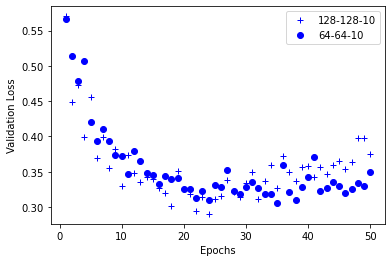

In [48]:
# plotting the original layer size model against a model with half the size of the layer
net_a, net_b = '128-128-10', '64-64-10'
plot_loss_comparison(loss_a = histories[net_a].history['val_loss'],label_a = net_a,
                     loss_b = histories[net_b].history['val_loss'],label_b = net_b,
                     y_label = 'Validation Loss')

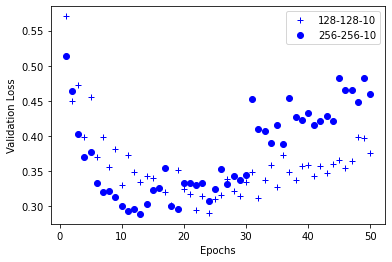

In [49]:
# plotting the original layer size model against a model with half the size of the layer
net_a, net_b = '128-128-10', '256-256-10'
plot_loss_comparison(loss_a = histories[net_a].history['val_loss'],label_a = net_a,
                     loss_b = histories[net_b].history['val_loss'],label_b = net_b,
                     y_label = 'Validation Loss')

In all 3 cases overfitting has been achieved.

In [50]:
val_loss = histories['128-128-10'].history['val_loss']
print('The original network with 3 layers starts overfitting after ' + str(np.argmin(val_loss)) + ' epochs.')
val_loss = histories['64-64-10'].history['val_loss']
print('The smaller sized network with 3 layers starts overfitting after ' + str(np.argmin(val_loss)) + ' epochs.')
val_loss = histories['256-256-10'].history['val_loss']
print('The bigger sized network with 3 layers starts overfitting after ' + str(np.argmin(val_loss)) + ' epochs.')

The original network with 3 layers starts overfitting after 23 epochs.
The smaller sized network with 3 layers starts overfitting after 34 epochs.
The bigger sized network with 3 layers starts overfitting after 12 epochs.


##  Regularizing your model and tuning your hyperparameters

In this step the optimal configuration of the model needs to be found. Several different model need to be built and evaluated to find the best version.

This step requires to: 


1. Add dropout layers.

2. Try different architectures.

3. Add regularization.

4. Try different hyperparameter.



To ensure there are no data leaks from the validation set, I will build models from scratch every time and rebuild a model with the best settings before finally training it on the whole training data and testing it.

In [51]:
# function for building advanced model with 2 dropout layers and weight regularization
# source: DLWP pages 108-110
def build_adv_model(layer_1_units, layer_2_units, layer_3_units):
    adv_model = models.Sequential()
    adv_model.add(layers.Dense(layer_1_units, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
    adv_model.add(layers.Dropout(0.5))
    adv_model.add(layers.Dense(layer_2_units, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    adv_model.add(layers.Dropout(0.5))
    adv_model.add(layers.Dense(layer_3_units, activation='softmax'))
    
    adv_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return adv_model

In [52]:
# building and training 3 advanced models with dropout and regulisation for 40 epochs with 3 layers each and each having different layer sizes
# source : DSM150-2021-OCT, lecture 4.403 Reducing the network's size
histories={}
for i in [64, 128, 256]:
    model = build_adv_model(i , i , 10)
    model_name = str(i) + '-' + str(i) + '-' + str(10)
    print('Training', model_name)
    history = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val, y_val),
                       verbose=0,
                       callbacks=[CostumCallback()])
    histories[model_name] = history

Training 64-64-10
/Training 128-128-10
/Training 256-256-10
/

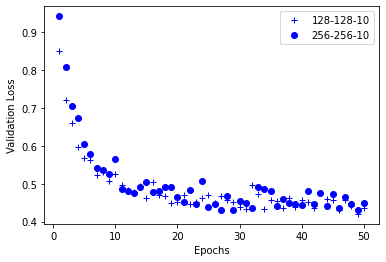

In [53]:
# plotting the original layer size model against a model with half the size of the layer
net_a, net_b = '128-128-10', '256-256-10'
plot_loss_comparison(loss_a = histories[net_a].history['val_loss'],label_a = net_a,
                     loss_b = histories[net_b].history['val_loss'],label_b = net_b,
                     y_label = 'Validation Loss')

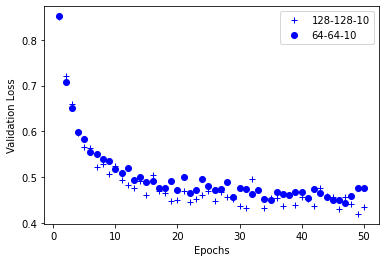

In [54]:
# plotting the original layer size model against a model with half the size of the layer
net_a, net_b = '128-128-10', '64-64-10'
plot_loss_comparison(loss_a = histories[net_a].history['val_loss'],label_a = net_a,
                     loss_b = histories[net_b].history['val_loss'],label_b = net_b,
                     y_label = 'Validation Loss')

The dropout layers and validation loss prevent overfitting but dont achieve the same validation loss as earlier, smaller networks. I will try and reduce the layersize again.

In [55]:
# Using smaller model with 1 dropout layer
new_model = models.Sequential()
new_model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(10, activation='softmax'))

new_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = new_model.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/50
98/98 [==============================] - 1s 10ms/step - loss: 0.9030 - accuracy: 0.6935 - val_loss: 0.5875 - val_accuracy: 0.7872
Epoch 2/50
98/98 [==============================] - 1s 8ms/step - loss: 0.5788 - accuracy: 0.7994 - val_loss: 0.4818 - val_accuracy: 0.8280
Epoch 3/50
98/98 [==============================] - 1s 8ms/step - loss: 0.5065 - accuracy: 0.8233 - val_loss: 0.4375 - val_accuracy: 0.8467
Epoch 4/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4719 - accuracy: 0.8358 - val_loss: 0.4086 - val_accuracy: 0.8568
Epoch 5/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4454 - accuracy: 0.8427 - val_loss: 0.3891 - val_accuracy: 0.8628
Epoch 6/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4251 - accuracy: 0.8502 - val_loss: 0.3757 - val_accuracy: 0.8665
Epoch 7/50
98/98 [==============================] - 1s 8ms/step - loss: 0.4114 - accuracy: 0.8531 - val_loss: 0.3657 - val_accuracy: 0.8705
Epoch 8/50
98/98 [=

In [57]:
# function for plotting training and validation loss
# source : DSM150-2021-OCT, lecture 3.407 Validating and training

def plot_epochs(x,
                   y_A, style_A, label_A,
                   y_B, style_B, label_B,
                   title, x_label, y_label):
    plt.clf()
    plt.plot(x, y_A, style_A, label = label_A)
    plt.plot(x, y_B, style_B, label = label_B)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

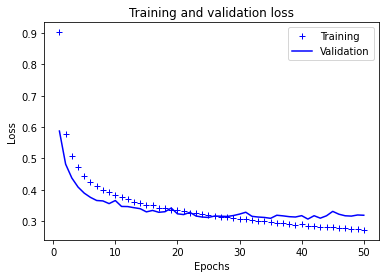

In [58]:
# plotting training and validation loss
# source : DSM150-2021-OCT, lecture 3.407 Validating and training

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

In [59]:
new_model_adam = models.Sequential()
new_model_adam.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
new_model_adam.add(layers.Dropout(0.5))
new_model_adam.add(layers.Dense(10, activation='softmax'))

new_model_adam.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_adam.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/50
98/98 [==============================] - 2s 13ms/step - loss: 0.9560 - accuracy: 0.6693 - val_loss: 0.5763 - val_accuracy: 0.8031
Epoch 2/50
98/98 [==============================] - 1s 8ms/step - loss: 0.5997 - accuracy: 0.7985 - val_loss: 0.4765 - val_accuracy: 0.8386
Epoch 3/50
98/98 [==============================] - 1s 8ms/step - loss: 0.5255 - accuracy: 0.8207 - val_loss: 0.4419 - val_accuracy: 0.8479
Epoch 4/50
98/98 [==============================] - 1s 8ms/step - loss: 0.4851 - accuracy: 0.8318 - val_loss: 0.4138 - val_accuracy: 0.8556
Epoch 5/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4604 - accuracy: 0.8397 - val_loss: 0.3983 - val_accuracy: 0.8577
Epoch 6/50
98/98 [==============================] - 1s 8ms/step - loss: 0.4431 - accuracy: 0.8444 - val_loss: 0.3872 - val_accuracy: 0.8596
Epoch 7/50
98/98 [==============================] - 1s 8ms/step - loss: 0.4291 - accuracy: 0.8488 - val_loss: 0.3756 - val_accuracy: 0.8674
Epoch 8/50
98/98 [=

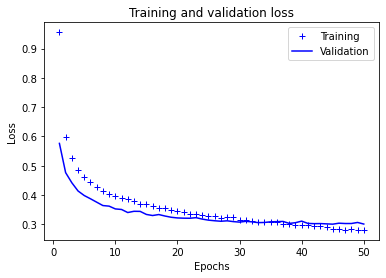

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

Validation accuarcy and validation loss don't change when changing from 'rmsprop' to 'adam' as optimizers.

Adding one more layer again and evaluating model.

In [61]:
# trying medium size network with 3 layers and 1 dropout layer
new_model_3 = models.Sequential()
new_model_3.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
new_model_3.add(layers.Dense(128, activation='relu'))
new_model_3.add(layers.Dropout(0.5))
new_model_3.add(layers.Dense(10, activation='softmax'))

new_model_3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_3.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/50
98/98 [==============================] - 2s 11ms/step - loss: 0.8465 - accuracy: 0.7041 - val_loss: 0.5698 - val_accuracy: 0.7935
Epoch 2/50
98/98 [==============================] - 1s 10ms/step - loss: 0.5474 - accuracy: 0.8078 - val_loss: 0.4842 - val_accuracy: 0.8157
Epoch 3/50
98/98 [==============================] - 1s 10ms/step - loss: 0.4752 - accuracy: 0.8304 - val_loss: 0.4122 - val_accuracy: 0.8523
Epoch 4/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4313 - accuracy: 0.8451 - val_loss: 0.4014 - val_accuracy: 0.8551
Epoch 5/50
98/98 [==============================] - 1s 10ms/step - loss: 0.4040 - accuracy: 0.8538 - val_loss: 0.3733 - val_accuracy: 0.8656
Epoch 6/50
98/98 [==============================] - 1s 9ms/step - loss: 0.3872 - accuracy: 0.8608 - val_loss: 0.3633 - val_accuracy: 0.8697
Epoch 7/50
98/98 [==============================] - 1s 9ms/step - loss: 0.3693 - accuracy: 0.8652 - val_loss: 0.3610 - val_accuracy: 0.8710
Epoch 8/50
98/98

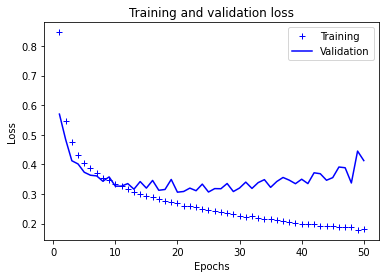

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

Trying smaller layer sizes and fewer epochs.

In [63]:
# trying small network with small layersize (64)
new_model_4 = models.Sequential()
new_model_4.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
new_model_4.add(layers.Dropout(0.5))
new_model_4.add(layers.Dense(10, activation='softmax'))

new_model_3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_3.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
98/98 [==============================] - 2s 11ms/step - loss: 0.1877 - accuracy: 0.9292 - val_loss: 0.3814 - val_accuracy: 0.8907
Epoch 2/20
98/98 [==============================] - 1s 10ms/step - loss: 0.1779 - accuracy: 0.9313 - val_loss: 0.4341 - val_accuracy: 0.8796
Epoch 3/20
98/98 [==============================] - 1s 9ms/step - loss: 0.1753 - accuracy: 0.9321 - val_loss: 0.4125 - val_accuracy: 0.8884
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.1729 - accuracy: 0.9344 - val_loss: 0.3841 - val_accuracy: 0.8952
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.1717 - accuracy: 0.9343 - val_loss: 0.4217 - val_accuracy: 0.8904
Epoch 6/20
98/98 [==============================] - 1s 9ms/step - loss: 0.1720 - accuracy: 0.9332 - val_loss: 0.4148 - val_accuracy: 0.8906
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.1672 - accuracy: 0.9363 - val_loss: 0.4292 - val_accuracy: 0.8808
Epoch 8/20
98/9

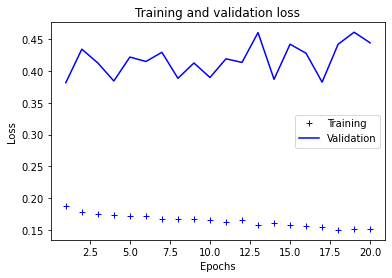

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

Whatever I have tried the highest validation accuarcy was ~ 89%.

In [65]:
# trying small network with 1 dropout layer and without regularizer
new_model_5 = models.Sequential()
new_model_5.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
new_model_5.add(layers.Dropout(0.5))
new_model_5.add(layers.Dense(10, activation='softmax'))

new_model_5.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_5.fit(partial_x_train,
partial_y_train,
epochs=25,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/25
98/98 [==============================] - 1s 10ms/step - loss: 0.9118 - accuracy: 0.6897 - val_loss: 0.5997 - val_accuracy: 0.7898
Epoch 2/25
98/98 [==============================] - 1s 9ms/step - loss: 0.5909 - accuracy: 0.7974 - val_loss: 0.4867 - val_accuracy: 0.8248
Epoch 3/25
98/98 [==============================] - 1s 9ms/step - loss: 0.5140 - accuracy: 0.8190 - val_loss: 0.4495 - val_accuracy: 0.8392
Epoch 4/25
98/98 [==============================] - 1s 9ms/step - loss: 0.4734 - accuracy: 0.8328 - val_loss: 0.4232 - val_accuracy: 0.8467
Epoch 5/25
98/98 [==============================] - 1s 9ms/step - loss: 0.4486 - accuracy: 0.8410 - val_loss: 0.3976 - val_accuracy: 0.8533
Epoch 6/25
98/98 [==============================] - 1s 8ms/step - loss: 0.4287 - accuracy: 0.8461 - val_loss: 0.3796 - val_accuracy: 0.8643
Epoch 7/25
98/98 [==============================] - 1s 8ms/step - loss: 0.4117 - accuracy: 0.8536 - val_loss: 0.3771 - val_accuracy: 0.8594
Epoch 8/25
98/98 [=

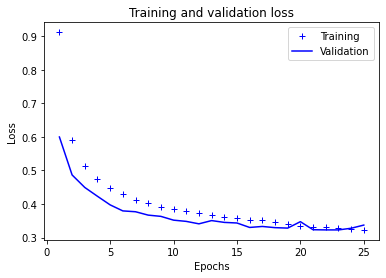

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

In [67]:
# trying small network with 1 dropout layer and regularizer
new_model_6 = models.Sequential()
new_model_6.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)))
new_model_6.add(layers.Dropout(0.5))
new_model_6.add(layers.Dense(10, activation='softmax'))

new_model_6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_6.fit(partial_x_train,
partial_y_train,
epochs=25,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/25
98/98 [==============================] - 1s 11ms/step - loss: 1.0882 - accuracy: 0.6935 - val_loss: 0.7600 - val_accuracy: 0.7982
Epoch 2/25
98/98 [==============================] - 1s 10ms/step - loss: 0.7459 - accuracy: 0.7953 - val_loss: 0.6474 - val_accuracy: 0.8210
Epoch 3/25
98/98 [==============================] - 1s 9ms/step - loss: 0.6597 - accuracy: 0.8180 - val_loss: 0.5885 - val_accuracy: 0.8354
Epoch 4/25
98/98 [==============================] - 1s 9ms/step - loss: 0.6116 - accuracy: 0.8276 - val_loss: 0.5490 - val_accuracy: 0.8461
Epoch 5/25
98/98 [==============================] - 1s 9ms/step - loss: 0.5816 - accuracy: 0.8334 - val_loss: 0.5767 - val_accuracy: 0.8227
Epoch 6/25
98/98 [==============================] - 1s 9ms/step - loss: 0.5564 - accuracy: 0.8390 - val_loss: 0.5133 - val_accuracy: 0.8496
Epoch 7/25
98/98 [==============================] - 1s 10ms/step - loss: 0.5395 - accuracy: 0.8410 - val_loss: 0.5013 - val_accuracy: 0.8464
Epoch 8/25
98/98 

In [68]:
# trying huge network with several layers
new_model_7 = models.Sequential()
new_model_7.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)))
new_model_7.add(layers.Dense(128, activation='relu'))
new_model_7.add(layers.Dropout(0.5))
new_model_7.add(layers.Dense(128, activation='relu'))
new_model_7.add(layers.Dropout(0.5))
new_model_7.add(layers.Dense(128, activation='relu'))
new_model_7.add(layers.Dropout(0.5))
new_model_7.add(layers.Dense(10, activation='softmax'))

new_model_7.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = new_model_7.fit(partial_x_train,
partial_y_train,
epochs=25,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/25
98/98 [==============================] - 3s 19ms/step - loss: 1.3659 - accuracy: 0.5624 - val_loss: 0.7627 - val_accuracy: 0.7613
Epoch 2/25
98/98 [==============================] - 1s 14ms/step - loss: 0.8328 - accuracy: 0.7444 - val_loss: 0.6585 - val_accuracy: 0.8066
Epoch 3/25
98/98 [==============================] - 2s 19ms/step - loss: 0.7079 - accuracy: 0.7931 - val_loss: 0.5555 - val_accuracy: 0.8398 0s - loss: 0.7142 - 
Epoch 4/25
98/98 [==============================] - 2s 18ms/step - loss: 0.6395 - accuracy: 0.8146 - val_loss: 0.5705 - val_accuracy: 0.8327
Epoch 5/25
98/98 [==============================] - 1s 15ms/step - loss: 0.5956 - accuracy: 0.8295 - val_loss: 0.5430 - val_accuracy: 0.8408
Epoch 6/25
98/98 [==============================] - 1s 15ms/step - loss: 0.5690 - accuracy: 0.8344 - val_loss: 0.4918 - val_accuracy: 0.8562
Epoch 7/25
98/98 [==============================] - 1s 15ms/step - loss: 0.5468 - accuracy: 0.8410 - val_loss: 0.5148 - val_accuracy:

At this point several models/networks have been tried, but no perfect solution that achieves a validation accuracy of +90% has been found. I will experiment with a smaller network and try different learning rates aswell.

In [71]:
# small model without dropout layer or weight regularization, optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy
# batch size 512, epochs 30
# source for optimizer and loss function : https://www.tensorflow.org/tutorials/keras/classification
small_model = models.Sequential()
small_model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
small_model.add(layers.Dense(10, activation='softmax'))
            
small_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))         

Epoch 1/30
98/98 [==============================] - 1s 9ms/step - loss: 0.7405 - accuracy: 0.7537 - val_loss: 0.5248 - val_accuracy: 0.8214
Epoch 2/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4780 - accuracy: 0.8380 - val_loss: 0.4504 - val_accuracy: 0.8471
Epoch 3/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4298 - accuracy: 0.8523 - val_loss: 0.4216 - val_accuracy: 0.8558
Epoch 4/30
98/98 [==============================] - 1s 7ms/step - loss: 0.4081 - accuracy: 0.8578 - val_loss: 0.4073 - val_accuracy: 0.8572
Epoch 5/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3811 - accuracy: 0.8692 - val_loss: 0.3858 - val_accuracy: 0.8684
Epoch 6/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3640 - accuracy: 0.8737 - val_loss: 0.3842 - val_accuracy: 0.8649
Epoch 7/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3519 - accuracy: 0.8765 - val_loss: 0.3666 - val_accuracy: 0.8725
Epoch 8/30
98/98 [==

In [72]:
# trying the same network with same amount of epochs but smaller batch size 256
small_model2 = models.Sequential()
small_model2.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
small_model2.add(layers.Dense(10, activation='softmax'))
            
small_model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model2.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=256,
validation_data=(x_val, y_val))         

Epoch 1/30
196/196 [==============================] - 1s 4ms/step - loss: 0.6432 - accuracy: 0.7815 - val_loss: 0.4687 - val_accuracy: 0.8411
Epoch 2/30
196/196 [==============================] - 1s 4ms/step - loss: 0.4428 - accuracy: 0.8472 - val_loss: 0.4173 - val_accuracy: 0.8570
Epoch 3/30
196/196 [==============================] - 1s 4ms/step - loss: 0.3974 - accuracy: 0.8619 - val_loss: 0.3991 - val_accuracy: 0.8628
Epoch 4/30
196/196 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8689 - val_loss: 0.3945 - val_accuracy: 0.8591
Epoch 5/30
196/196 [==============================] - 1s 4ms/step - loss: 0.3535 - accuracy: 0.8755 - val_loss: 0.3615 - val_accuracy: 0.8709
Epoch 6/30
196/196 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8811 - val_loss: 0.3670 - val_accuracy: 0.8683
Epoch 7/30
196/196 [==============================] - 1s 4ms/step - loss: 0.3225 - accuracy: 0.8837 - val_loss: 0.3426 - val_accuracy: 0.8757
Epoch 

In [73]:
# trying the same network with same amount of epochs regular bach size but layer size is halfed (64)
small_model3 = models.Sequential()
small_model3.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
small_model3.add(layers.Dense(10, activation='softmax'))
            
small_model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model3.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))         

Epoch 1/30
98/98 [==============================] - 1s 6ms/step - loss: 0.8096 - accuracy: 0.7348 - val_loss: 0.5485 - val_accuracy: 0.8191
Epoch 2/30
98/98 [==============================] - 1s 7ms/step - loss: 0.5061 - accuracy: 0.8297 - val_loss: 0.4824 - val_accuracy: 0.8391
Epoch 3/30
98/98 [==============================] - 1s 10ms/step - loss: 0.4559 - accuracy: 0.8436 - val_loss: 0.4494 - val_accuracy: 0.8465
Epoch 4/30
98/98 [==============================] - 1s 9ms/step - loss: 0.4286 - accuracy: 0.8524 - val_loss: 0.4265 - val_accuracy: 0.8544
Epoch 5/30
98/98 [==============================] - 1s 7ms/step - loss: 0.4112 - accuracy: 0.8589 - val_loss: 0.4134 - val_accuracy: 0.8568
Epoch 6/30
98/98 [==============================] - 1s 8ms/step - loss: 0.3985 - accuracy: 0.8625 - val_loss: 0.4107 - val_accuracy: 0.8613
Epoch 7/30
98/98 [==============================] - 1s 6ms/step - loss: 0.3840 - accuracy: 0.8680 - val_loss: 0.3904 - val_accuracy: 0.8662
Epoch 8/30
98/98 [=

In [74]:
# trying the same network with same amount of epochs regular bach size, but opzimizer = rmsprop
small_model3 = models.Sequential()
small_model3.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
small_model3.add(layers.Dense(10, activation='softmax'))
            
small_model3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model3.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))         

Epoch 1/30
98/98 [==============================] - 2s 14ms/step - loss: 0.7867 - accuracy: 0.7351 - val_loss: 0.5688 - val_accuracy: 0.7971
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 0.5234 - accuracy: 0.8155 - val_loss: 0.5476 - val_accuracy: 0.8043
Epoch 3/30
98/98 [==============================] - 1s 11ms/step - loss: 0.4644 - accuracy: 0.8347 - val_loss: 0.4505 - val_accuracy: 0.8403
Epoch 4/30
98/98 [==============================] - 1s 12ms/step - loss: 0.4262 - accuracy: 0.8486 - val_loss: 0.4168 - val_accuracy: 0.850262 - accuracy: 0.
Epoch 5/30
98/98 [==============================] - 1s 12ms/step - loss: 0.4019 - accuracy: 0.8573 - val_loss: 0.3948 - val_accuracy: 0.8613
Epoch 6/30
98/98 [==============================] - 1s 15ms/step - loss: 0.3834 - accuracy: 0.8609 - val_loss: 0.4037 - val_accuracy: 0.8535
Epoch 7/30
98/98 [==============================] - 2s 16ms/step - loss: 0.3618 - accuracy: 0.8697 - val_loss: 0.3626 - val_accuracy: 0.87

In [76]:
# trying the same  as cell above network with same amount of epochs and different layer size
small_model4 = models.Sequential()
small_model4.add(layers.Dense(100, activation='relu', input_shape=(28 * 28,)))
small_model4.add(layers.Dense(10, activation='softmax'))
            
small_model4.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model4.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))         

Epoch 1/30
98/98 [==============================] - 1s 10ms/step - loss: 0.7805 - accuracy: 0.7344 - val_loss: 0.5798 - val_accuracy: 0.8062
Epoch 2/30
98/98 [==============================] - 1s 8ms/step - loss: 0.5211 - accuracy: 0.8182 - val_loss: 0.4781 - val_accuracy: 0.8349
Epoch 3/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4624 - accuracy: 0.8369 - val_loss: 0.4414 - val_accuracy: 0.8457
Epoch 4/30
98/98 [==============================] - 1s 15ms/step - loss: 0.4292 - accuracy: 0.8479 - val_loss: 0.4330 - val_accuracy: 0.8477
Epoch 5/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4015 - accuracy: 0.8578 - val_loss: 0.4022 - val_accuracy: 0.8595
Epoch 6/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3867 - accuracy: 0.8610 - val_loss: 0.3945 - val_accuracy: 0.8608
Epoch 7/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3708 - accuracy: 0.8673 - val_loss: 0.3937 - val_accuracy: 0.8594
Epoch 8/30
98/98 [

In [79]:
# trying to add dropout to the original small network
# batch size 512, epochs 30
small_model5 = models.Sequential()
small_model5.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
small_model5.add(layers.Dropout(0.5))
small_model5.add(layers.Dense(10, activation='softmax'))
            
small_model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model5.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))    

Epoch 1/30
98/98 [==============================] - 1s 10ms/step - loss: 0.9444 - accuracy: 0.6742 - val_loss: 0.5644 - val_accuracy: 0.8154
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 0.5892 - accuracy: 0.7997 - val_loss: 0.4720 - val_accuracy: 0.8369
Epoch 3/30
98/98 [==============================] - 1s 8ms/step - loss: 0.5152 - accuracy: 0.8229 - val_loss: 0.4304 - val_accuracy: 0.8486
Epoch 4/30
98/98 [==============================] - 1s 9ms/step - loss: 0.4790 - accuracy: 0.8312 - val_loss: 0.4120 - val_accuracy: 0.8543
Epoch 5/30
98/98 [==============================] - 1s 9ms/step - loss: 0.4522 - accuracy: 0.8414 - val_loss: 0.3913 - val_accuracy: 0.8598
Epoch 6/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4326 - accuracy: 0.8480 - val_loss: 0.3808 - val_accuracy: 0.8646
Epoch 7/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4213 - accuracy: 0.8512 - val_loss: 0.3727 - val_accuracy: 0.8660
Epoch 8/30
98/98 [=

In [80]:
# trying to add dropout and regto the original small network
# batch size 512, epochs 30
small_model5 = models.Sequential()
small_model5.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))
small_model5.add(layers.Dropout(0.5))
small_model5.add(layers.Dense(10, activation='softmax'))
            
small_model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = small_model5.fit(partial_x_train,
partial_y_train,
epochs=30,
batch_size=512,
validation_data=(x_val, y_val))    

Epoch 1/30
98/98 [==============================] - 1s 10ms/step - loss: 1.1358 - accuracy: 0.6731 - val_loss: 0.7437 - val_accuracy: 0.8114
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 0.7628 - accuracy: 0.7969 - val_loss: 0.6338 - val_accuracy: 0.8345
Epoch 3/30
98/98 [==============================] - 1s 9ms/step - loss: 0.6747 - accuracy: 0.8166 - val_loss: 0.5717 - val_accuracy: 0.8486
Epoch 4/30
98/98 [==============================] - 1s 15ms/step - loss: 0.6195 - accuracy: 0.8293 - val_loss: 0.5413 - val_accuracy: 0.8494
Epoch 5/30
98/98 [==============================] - 1s 14ms/step - loss: 0.5897 - accuracy: 0.8327 - val_loss: 0.5135 - val_accuracy: 0.8572
Epoch 6/30
98/98 [==============================] - 1s 12ms/step - loss: 0.5652 - accuracy: 0.8387 - val_loss: 0.4958 - val_accuracy: 0.8593
Epoch 7/30
98/98 [==============================] - 1s 13ms/step - loss: 0.5409 - accuracy: 0.8435 - val_loss: 0.4812 - val_accuracy: 0.8639
Epoch 8/30
98/9

All the small models can not get below 0.3 validation loss and above 90% validation accuarcy even though, almost everything has been tried and experimented with. So as my final model I will go with a relative small simple network.

## Training and evaluation final network on whole dataset

In [81]:
# building final model and finding optimal amount if epochs
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
            
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
          
history = model.fit(partial_x_train,
partial_y_train,
epochs=40,
batch_size=512,
validation_data=(x_val, y_val))          

Epoch 1/40
98/98 [==============================] - 1s 9ms/step - loss: 0.9198 - accuracy: 0.6836 - val_loss: 0.5561 - val_accuracy: 0.8109
Epoch 2/40
98/98 [==============================] - 1s 14ms/step - loss: 0.5842 - accuracy: 0.8017 - val_loss: 0.4692 - val_accuracy: 0.8364
Epoch 3/40
98/98 [==============================] - 1s 13ms/step - loss: 0.5120 - accuracy: 0.8242 - val_loss: 0.4359 - val_accuracy: 0.8477
Epoch 4/40
98/98 [==============================] - 1s 10ms/step - loss: 0.4716 - accuracy: 0.8357 - val_loss: 0.4111 - val_accuracy: 0.8569
Epoch 5/40
98/98 [==============================] - 1s 10ms/step - loss: 0.4473 - accuracy: 0.8449 - val_loss: 0.3922 - val_accuracy: 0.8614
Epoch 6/40
98/98 [==============================] - 1s 13ms/step - loss: 0.4284 - accuracy: 0.8491 - val_loss: 0.3787 - val_accuracy: 0.8646
Epoch 7/40
98/98 [==============================] - 1s 15ms/step - loss: 0.4150 - accuracy: 0.8532 - val_loss: 0.3718 - val_accuracy: 0.8696
Epoch 8/40
98/

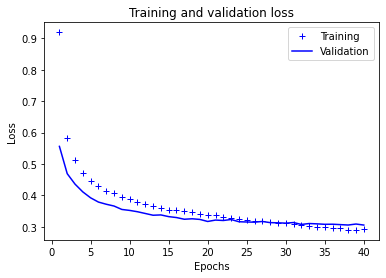

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1),
            loss, 'b+', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

In [83]:
print(np.argmin(val_loss), 'epochs')

39 epochs


In [84]:
# training on optimal epochs with whole training set
model.fit(train_images, train_labels, epochs=np.argmin(val_loss))

Epoch 1/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4409 - accuracy: 0.8368: 0s - los
Epoch 2/39
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3902 - accuracy: 0.8558
Epoch 3/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8612: 0s - loss: 0.3746 - accuracy
Epoch 4/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3661 - accuracy: 0.8646
Epoch 5/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8667: 0s - loss: 0.3592 - accuracy: 
Epoch 6/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8699
Epoch 7/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3507 - accuracy: 0.8697
Epoch 8/39
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3454 - accuracy: 0.8719
Epoch 9/39
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3438 - accuracy: 0.8720
Epoch 10/3

In [85]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.87 - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8791


In [86]:
results

[0.36755579710006714, 0.8791000247001648]

# Results

## Accuracy

The model achieved an accuracy of 87% on the test set. During training with the whole training data the validation loss actually dipped below the 0.3 which it was converging against beforehand in training. Overall this result is satisyfing as the accuarcy on the test set came close to 90%. Also the keras tutorial achieved 88% accuarcy on the test set aswell, which means my model didn't perform worse than that. Considering that the imagines are greyscale the model does a pretty good job at extracting features.

# Conclusion

The very first, basic neural network was actually almost unbeatable even though several different models have been experimented with. Changing size of the network only made validation loss worse and adding regularisations stopped the model from overfitting but also in return for stopping the validation loss from improving.

When adding dropout layers, I noticed that the optimal number of epochs is very close to the actual number of epochs and when experimenting with the number of epochs while using a model with dropout layers the optimal number of epochs will only go up.

Changing optimizer did not result in any difference in performance at all aswell.

Since only freshly built models were used to experiment with hyperparameters no information was leaked and the validation set was fine to use all the time.